In [1]:
from mxnet import gluon
from mxnet import ndarray as nd
from mxnet import autograd as ag
from matplotlib import pyplot as plt

import utils


def transform(data, label):
    return data.astype('float32')/255, label.astype('float32')


mnist_train = gluon.data.vision.FashionMNIST(train=True, transform=transform)
mnist_test = gluon.data.vision.FashionMNIST(train=False, transform=transform)

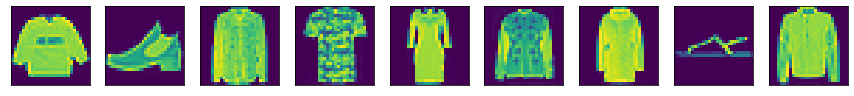

In [2]:
def show_images(images):
    n = images.shape[0]
    _, figs = plt.subplots(1, n, figsize=(15,15))
    for i in range(n):
        figs[i].imshow(images[i].reshape((28,28)).asnumpy())
        figs[i].axes.get_xaxis().set_visible(False)
        figs[i].axes.get_yaxis().set_visible(False)
    plt.show()


def get_text_labels(label):
    text_labels = [
        't-shirt', 'trouser', 'pullover', 'dress', 'coat',
        'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'
    ]
    return [text_labels[int(i)] for i in label]

data, label = mnist_train[0:9]
show_images(data)

In [3]:
batch_size = 256
train_data = gluon.data.DataLoader(mnist_train, batch_size, shuffle=True)
test_data = gluon.data.DataLoader(mnist_test, batch_size, shuffle=False)

In [4]:
num_inputs = 28 *28
num_outputs = 10
w = nd.random_normal(shape=(num_inputs, num_outputs))
b = nd.random_normal(shape=num_outputs)
params = [w, b]

In [5]:
for param in params:
    param.attach_grad()

In [6]:
def net(x):
    return utils.softmax(nd.dot(x.reshape((-1, num_inputs)), w) + b)

In [7]:
def evaluate_accuracy(data_iterator, net):
    acc = 0.
    for data, label in data_iterator:
        output = net(data)
        acc += utils.accuracy(output,label)
    return acc/len(data_iterator)

In [8]:
learning_rate = .1

for epoch in range(5):
    train_loss = 0.
    train_acc = 0.
    for data, label in train_data:
        with ag.record():
            output = net(data)
            loss = utils.cross_entropy(output, label)
        loss.backward()
        utils.SGD(params, learning_rate/batch_size)
        train_loss += nd.mean(loss).asscalar()
        train_acc += utils.accuracy(output, label)
    test_acc = evaluate_accuracy(test_data, net)
    print('Epoch %d, loss: %f, Train acc %f, test acc %f' % (epoch, train_loss/len(train_data), train_acc/len(train_data), test_acc))

Epoch 0, loss: 8.072627, Train acc 0.147080, test acc 0.222168
Epoch 1, loss: 4.810103, Train acc 0.287539, test acc 0.344434
Epoch 2, loss: 3.778120, Train acc 0.387794, test acc 0.423242
Epoch 3, loss: 3.242941, Train acc 0.450665, test acc 0.472852
Epoch 4, loss: 2.908501, Train acc 0.494116, test acc 0.506543


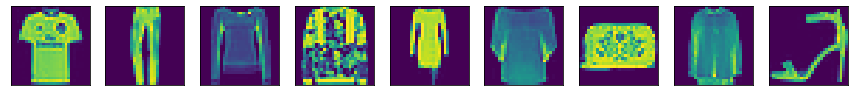

true labels
['t-shirt', 'trouser', 'pullover', 'pullover', 'dress', 'pullover', 'bag', 'shirt', 'sandal']
pridicted labels
['shirt', 'trouser', 'shirt', 'shirt', 'trouser', 'shirt', 'bag', 'shirt', 'sandal']


In [9]:
data, label = mnist_test[0:9]
show_images(data)
print('true labels')
print(get_text_labels(label))

predict_labels = net(data).argmax(axis=1)
print('pridicted labels')
print(get_text_labels(predict_labels.asnumpy()))